# Trading Agent Version 1.0
In this version, we focus on a singel company's stock, without considering trasaction cost, legal issue, and other restrictions.

<span style="color:red"> Please remember to install tensorflow under your environment please

In [1]:
#Load Data
import csv
import numpy as np

direction = './'
filename='stock_000063.csv'
with open(direction+filename) as file:
    f_csv=csv.reader(file)
    header=next(f_csv)
    Date_temp=[]
    OpenPrice_temp=[]
    HighPrice_temp=[]
    ClosePrice_temp=[]
    LowPrice_temp=[]
    Volume_temp=[]
    for row in f_csv:
        Date_temp.append(row[0])
        OpenPrice_temp.append(float(row[1]))
        HighPrice_temp.append(float(row[2]))
        ClosePrice_temp.append(float(row[3]))
        LowPrice_temp.append(float(row[4]))
        Volume_temp.append(float(row[5]))

Date=np.array(Date_temp)
OpenPrice=np.array(OpenPrice_temp)
HighPrice=np.array(HighPrice_temp)
ClosePrice=np.array(ClosePrice_temp)
LowPrice=np.array(LowPrice_temp)
Volume=np.array(Volume_temp)

assert OpenPrice.shape[0] == HighPrice.shape[0] == ClosePrice.shape[0]\
    == LowPrice.shape[0] == Volume.shape[0]

TransactionDays=OpenPrice.shape[0]

Date=np.flip(Date,0)
OpenPrice=np.flip(OpenPrice,0)
ClosePrice=np.flip(ClosePrice,0)
HighPrice=np.flip(HighPrice,0)
LowPrice=np.flip(LowPrice,0)
Volume=np.flip(Volume,0)

print('Open Price with shape: ',OpenPrice.shape)
print('Close Price with shape: ',ClosePrice.shape)
print('High Price with shape: ',HighPrice.shape)
print('Low Price with shape: ',LowPrice.shape)
print('Volume with shape: ',Volume.shape)

saveopen=OpenPrice

('Open Price with shape: ', (701,))
('Close Price with shape: ', (701,))
('High Price with shape: ', (701,))
('Low Price with shape: ', (701,))
('Volume with shape: ', (701,))


<span style="color:red">__WARNING__:</span>

<span style="color:red">Only have 701 transaction days for this company, please make sure:</span>

<span style="color:red">1) The number of transcation days is true</span>

<span style="color:red">2) For all of our data, we have the same number of transaction days (Avoid company which IPO during this interval)</span>

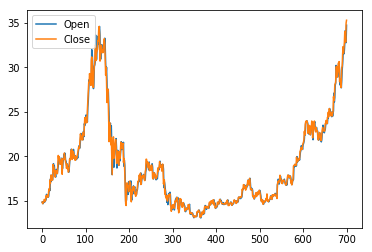

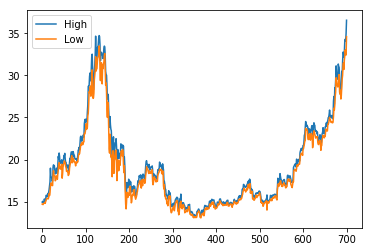

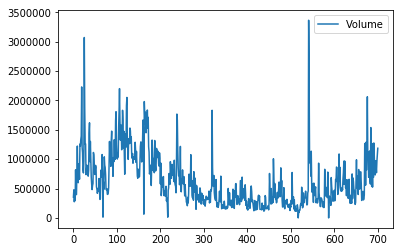

In [2]:
#Data plot test
from matplotlib import pyplot as plt

plt.plot(OpenPrice,label='Open')
plt.plot(ClosePrice,label='Close')
plt.legend()
plt.show()

plt.plot(HighPrice,label='High')
plt.plot(LowPrice,label='Low')
plt.legend()
plt.show()

plt.plot(Volume,label='Volume')
plt.legend()
plt.show()

In [3]:
#Form the training data set
HistoryDays=5

#OpenPrice Formation
save=OpenPrice
temp=np.vstack((save[1:len(save)-1],save[:len(save)-2]))
temp=temp.T
save=save[:len(save)-2]
for i in range(2,HistoryDays):
    save=save[:len(save)-1]
    temp=temp[:temp.shape[0]-1,:]
    temp=np.c_[temp,save]
X=temp

#ClosePrice Formation
save=ClosePrice
temp=np.vstack((save[1:len(save)-1],save[:len(save)-2]))
temp=temp.T
save=save[:len(save)-2]
for i in range(2,HistoryDays):
    save=save[:len(save)-1]
    temp=temp[:temp.shape[0]-1,:]
    temp=np.c_[temp,save]
X=np.concatenate((X,temp),axis=1)

#HighPrice Formation
save=HighPrice
temp=np.vstack((save[1:len(save)-1],save[:len(save)-2]))
temp=temp.T
save=save[:len(save)-2]
for i in range(2,HistoryDays):
    save=save[:len(save)-1]
    temp=temp[:temp.shape[0]-1,:]
    temp=np.c_[temp,save]
X=np.concatenate((X,temp),axis=1)

#ClosePrice Formation
save=LowPrice
temp=np.vstack((save[1:len(save)-1],save[:len(save)-2]))
temp=temp.T
save=save[:len(save)-2]
for i in range(2,HistoryDays):
    save=save[:len(save)-1]
    temp=temp[:temp.shape[0]-1,:]
    temp=np.c_[temp,save]
X=np.concatenate((X,temp),axis=1)

#Volume Formation
save=Volume
temp=np.vstack((save[1:len(save)-1],save[:len(save)-2]))
temp=temp.T
save=save[:len(save)-2]
for i in range(2,HistoryDays):
    save=save[:len(save)-1]
    temp=temp[:temp.shape[0]-1,:]
    temp=np.c_[temp,save]
X=np.concatenate((X,temp),axis=1)

X=X.T
print(X.shape)

(25, 696)


In [4]:
from ValueNetwork_v1_6_5 import training
import tensorflow as tf
tf.reset_default_graph()
training(X,OpenPrice[:len(OpenPrice)-HistoryDays],
         X,OpenPrice[:len(OpenPrice)-HistoryDays],
         fc_units=[64,64],
         l2_norm=0.01,
         seed=235,
         learning_rate=1e-2,
         epoch=10,
         input_size=X.shape[0]+2, # add two dimensions for Balance and Holding 
         epsilon=0.01,
         yita=1,
         verbose=False,
         TransactionRecord=True,
         InitialBalance=np.array([0,1e3]))

Building Parameters: 
fc_units=[64, 64]
l2_norm=0.01
seed=235
learning_rate=0.01
epoch 1 
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 


The program is finally runable now. But it seems that we can only get improvement in the first 2 epoch, and then the program would be stuck in somewhere. And no matter how many times I ran the program, it would give me the same best reward, so I really suspect that it is not correctly randomized. Further, it still has illegal operations, which is proven not avoidable by setting a huge punishment. And what seems ture is that it runs faster after several epoches.